In [2]:
%matplotlib inline
from sklearn import linear_model
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import cross_validation
import numpy as np
import matplotlib.pyplot as plt

#read in raw data
w = np.genfromtxt('raw_data/Walking.csv', delimiter=',')
j = np.genfromtxt('raw_data/Jogging.csv', delimiter=',')
s = np.genfromtxt('raw_data/Steps.csv', delimiter=',')
si = np.genfromtxt('raw_data/Sitting.csv', delimiter=',')
c = np.genfromtxt('raw_data/Car.csv', delimiter=',')

In [3]:
#function takes in sensor data of 10 seconds and returns lists of features to be used
def feature(data):
    sensors = {}
    features = [] # average and range, fft max and fft range for accelerations

    # total of 12 features
    sensors['acc_x'] = data[:,10]
    sensors['acc_y'] = data[:,11]
    sensors['acc_z'] = data[:,12]
    # sensors['rot_z'] = data[:,6]

    for sensor in sensors:
        d = sensors[sensor]
        features.append(np.mean(d))
        features.append(max(d) - min(d))
        fft_max, fft_range = fastfourier(d)
        features.append(fft_max)
        features.append(fft_range)

    return features

In [4]:
# function takes in data (one column)
# and returns maximum frequency and range after fast fourier transform
def fastfourier(data, show=False, interval=10.0):
    Fs = 100.0;  # sampling rate
    Ts = interval # time interval

    fft = np.fft.fft(data)
    freq = np.fft.fftfreq(len(data))*Fs
    
    index = np.argmax(abs(fft[1:]))
    maxfreq = abs(freq[index])
    minmax = max(abs(fft)) - min(abs(fft))

    # show data plot if specified
    if show:
        fig, ax = plt.subplots(2, 1)
        ax[0].plot(np.arange(0,1,1/(Fs*Ts)),data)
        ax[0].set_xlabel('Time')
        ax[0].set_ylabel('Amplitude')
        # plotting the spectrum and zooming in
        ax[1].plot(freq[:freq.size/10],abs(fft[:fft.size/10]),'r')
        ax[1].set_xlabel('Freq (Hz)')
        ax[1].set_ylabel('|Y(freq)|')
        plt.xticks(np.arange(0, 11, 1))
        plt.show()

    return maxfreq, minmax

/Users/katiewhan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:21: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


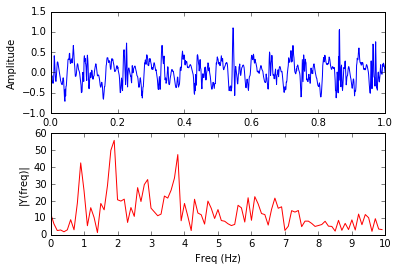

(1.8000000000000003, 55.705957398740061)

In [5]:
# sample fast fourier transform plot for walking acc_z data
fastfourier(w[2000:3000,12], True)

/Users/katiewhan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:21: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


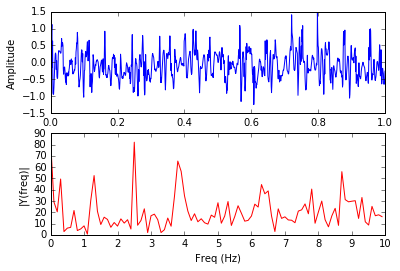

(2.3999999999999999, 83.718823125080178)

In [6]:
# sample fast fourier transform plot for jogging acc_z data
fastfourier(j[2000:3000,12], True)

/Users/katiewhan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:21: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


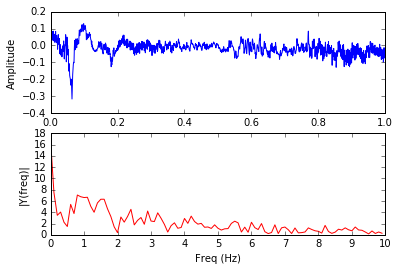

(0.20000000000000001, 16.803614786786966)

In [7]:
# sample fast fourier transform plot for car acc_z data
fastfourier(c[2000:3000,12], True)

/Users/katiewhan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:21: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


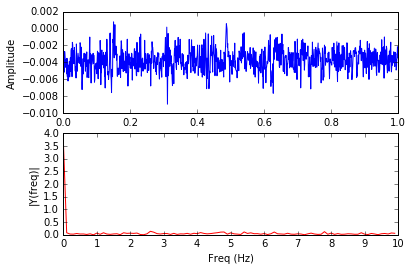

(2.5, 3.7316912008689269)

In [8]:
# sample fast fourier transform plot for sitting acc_z data
fastfourier(si[2000:3000,12], True)

In [9]:
# load feature data to prepare for classification
# 0 = walking, 1 = jogging, 2 = steps, 3 = sitting, 4 = car
train_data = []
train_target = []
test_data = []
test_target = []
all_data = []
all_target = []

#add walking data
for i in range(1,31):
    # trim the first ten seconds of raw data
    x = 1000*i
    all_data.append(feature(w[x:x+1000]))
    all_target.append(0)
    if (i < 25):
        train_data.append(feature(w[x:x+1000]))
        train_target.append(0)
    else:
        test_data.append(feature(w[x:x+1000]))
        test_target.append(0)

#add jogging data
for i in range(1,31):
    # trim the first ten seconds of raw data
    x = 1000*i
    all_data.append(feature(j[x:x+1000]))
    all_target.append(1)
    if (i < 25):
        train_data.append(feature(j[x:x+1000]))
        train_target.append(1)
    else:
        test_data.append(feature(j[x:x+1000]))
        test_target.append(1)

#add steps data
for i in range(1,31):
    # trim the first ten seconds of raw data
    x = 1000*i
    all_data.append(feature(s[x:x+1000]))
    all_target.append(2)
    if (i < 25):
        train_data.append(feature(s[x:x+1000]))
        train_target.append(2)
    else:
        test_data.append(feature(s[x:x+1000]))
        test_target.append(2)
        
#add sitting data
for i in range(1,31):
    # trim the first ten seconds of raw data
    x = 1000*i
    all_data.append(feature(si[x:x+1000]))
    all_target.append(3)
    if (i < 25):
        train_data.append(feature(si[x:x+1000]))
        train_target.append(3)
    else:
        test_data.append(feature(si[x:x+1000]))
        test_target.append(3)

#add car data
for i in range(1,31):
    # trim the first ten seconds of raw data
    x = 1000*i
    all_data.append(feature(c[x:x+1000]))
    all_target.append(4)
    if (i < 25):
        train_data.append(feature(c[x:x+1000]))
        train_target.append(4)
    else:
        test_data.append(feature(c[x:x+1000]))
        test_target.append(4)

In [13]:
# logistic regression classifier
regr = linear_model.LogisticRegression()
regr.fit(train_data, train_target)
# percentage score for classification
regr.score(test_data, test_target)

0.93333333333333335

In [14]:
# decision tree classifier
dtree = tree.DecisionTreeClassifier()
dtree.fit(train_data, train_target)
# percentage score for classification
dtree.score(test_data, test_target)

1.0

In [15]:
# k-nearest neighbors classifier
knn = neighbors.KNeighborsClassifier()
knn.fit(train_data, train_target)
# percentage score for classification
knn.predict(test_data)

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 3, 3, 3, 3, 3,
       3, 3, 4, 3, 4, 4, 3])

In [16]:
knn.score(test_data, test_target)

0.8666666666666667

In [17]:
# svm linear classifier
clf = svm.SVC(kernel='linear')
clf.fit(train_data, train_target)
# percentage score for classification
clf.score(test_data, test_target)

0.96666666666666667

In [18]:
# cross-validation for logistic regression
cross_validation.cross_val_score(regr, all_data, all_target, cv=5)

array([ 0.96666667,  0.9       ,  0.9       ,  0.93333333,  0.93333333])

In [19]:
# cross-validation for decision tree
cross_validation.cross_val_score(dtree, all_data, all_target, cv=5)

array([ 1.        ,  0.96666667,  0.96666667,  0.96666667,  1.        ])

In [20]:
# cross-validation for k-nearest
cross_validation.cross_val_score(knn, all_data, all_target, cv=5)

array([ 0.9       ,  1.        ,  0.96666667,  0.93333333,  0.86666667])

In [21]:
# cross-validation for svm
cross_validation.cross_val_score(clf, all_data, all_target, cv=5)

array([ 1.        ,  0.9       ,  1.        ,  1.        ,  0.96666667])

In [16]:
# OTHER ACTIVITIES import raw data
t = np.genfromtxt('raw_data/Takeoff.csv', delimiter=',')
b = np.genfromtxt('raw_data/Breathing.csv', delimiter=',')

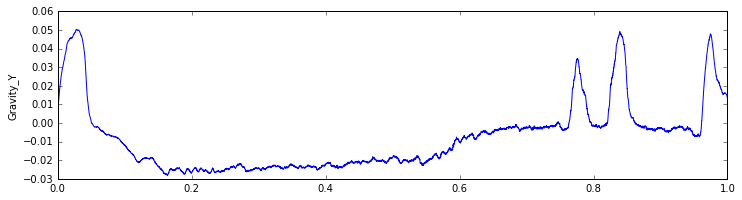

In [17]:
# graphing gravity_y of takeoff sensor data shows intesting section where plane was actually in take off
trimmed_y = t[7000:20000,8]
trimmed_x = t[7000:20000,0]
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
ax.plot(np.arange(0,1,1/13000), trimmed_y)
ax.set_ylabel('Gravity_Y')
plt.show()

/Users/katiewhan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:21: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


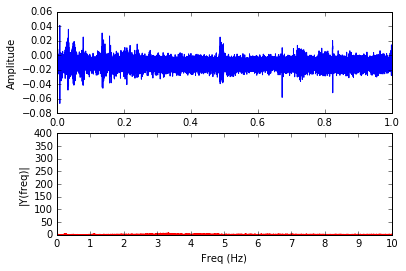

(3.3277777777777779, 362.89716735102394)

In [39]:
# fast fourier with breathing data
trimmed_b = b[1000:37000,12]
fastfourier(trimmed_b, True, 360)

In [42]:
fft = np.fft.fft(trimmed_b)
freq = np.fft.fftfreq(len(trimmed_b))*100
# frequency at max within specified interval
abs(freq[np.argmax(abs(fft[500:1000]))])

1.2694444444444446

### Features and Classification

For my five activities, I used a total of 12 features: average, max - min, frequency at max after fast fourier transform, and max - min after fast fourier transform for each of the accerlerometer x, y, and z dataset. With the first four minutes of data as training data and the last one minute as test data, I ran classifications using logistic regression, decision tree, k nearest neighbors, and SVM. All four classifications yielded high scores, with decision tree showing 100%. I also cross validated with 5 folds for the four classifiers, which showed equally high percentages. These results are probably due to the fact that my activities were significantly different from each other in terms of acceleration of the phone involved. I included the predict results of KNN to specifically show which categories were most similar to each other; steps (2) and walking (0) showed a little bit of overlap while sitting (3) and car ride (4) showed the most confusion with each other. These findings all make sense in terms of my movement for the activities!

### Extra Things

During spring break, I collected sensor data while taking off on a plane. I was hoping to use the data for classficiation, but after looking at the data, I realized the actual takeoff time frame was too short (shorter than five minutes) to be used in the assignment. I still found the sensor data very interesting. Specifically for gravity sensors, the graph shows a long section of flattening while the plane was taking off. The change is more apparent when the entire raw data is graphed on Excel, but I tried my best to show it on this notebook as well.

As for my breathing data, I captured five minutes of sensor data with my phone on my chest and tried to use fast fourier transform to see the most frequent frequency between the "signals" or "breaths". The results from my function gave me 3.33 Hz, or 3.33 breaths per second, which seemed a bit too fast. I figured that the larger numbers from the FFT (towards the right on the graph) were noise and also noticed that there was a bump in the graph near 1 Hz. I manually set the interval of data to find that local maxima, which gave me 1.27 Hz, or 1.27 breaths per second. This seems to be the most reasonable conclusion.